sdi1600042 Eleftherios Dimitras

sdi1600119 Michael Xanthopoulos

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import collections       as col
import folium            as fol

from folium.plugins       import MarkerCluster
from sklearn.cluster      import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
df = pd.read_csv("./crime.csv" , sep = "\t", delimiter=",", low_memory=False)

# We replace the Nan values with the 'N' character
# for the columns 'SHOOTING' and 'DISTRICT' only.
# (We need to replace them in 'DISTRICT' column too for functionality reasons)
df['SHOOTING'].fillna('N',inplace=True)
df['DISTRICT'].fillna('N',inplace=True)

1ο Ερώτημα:

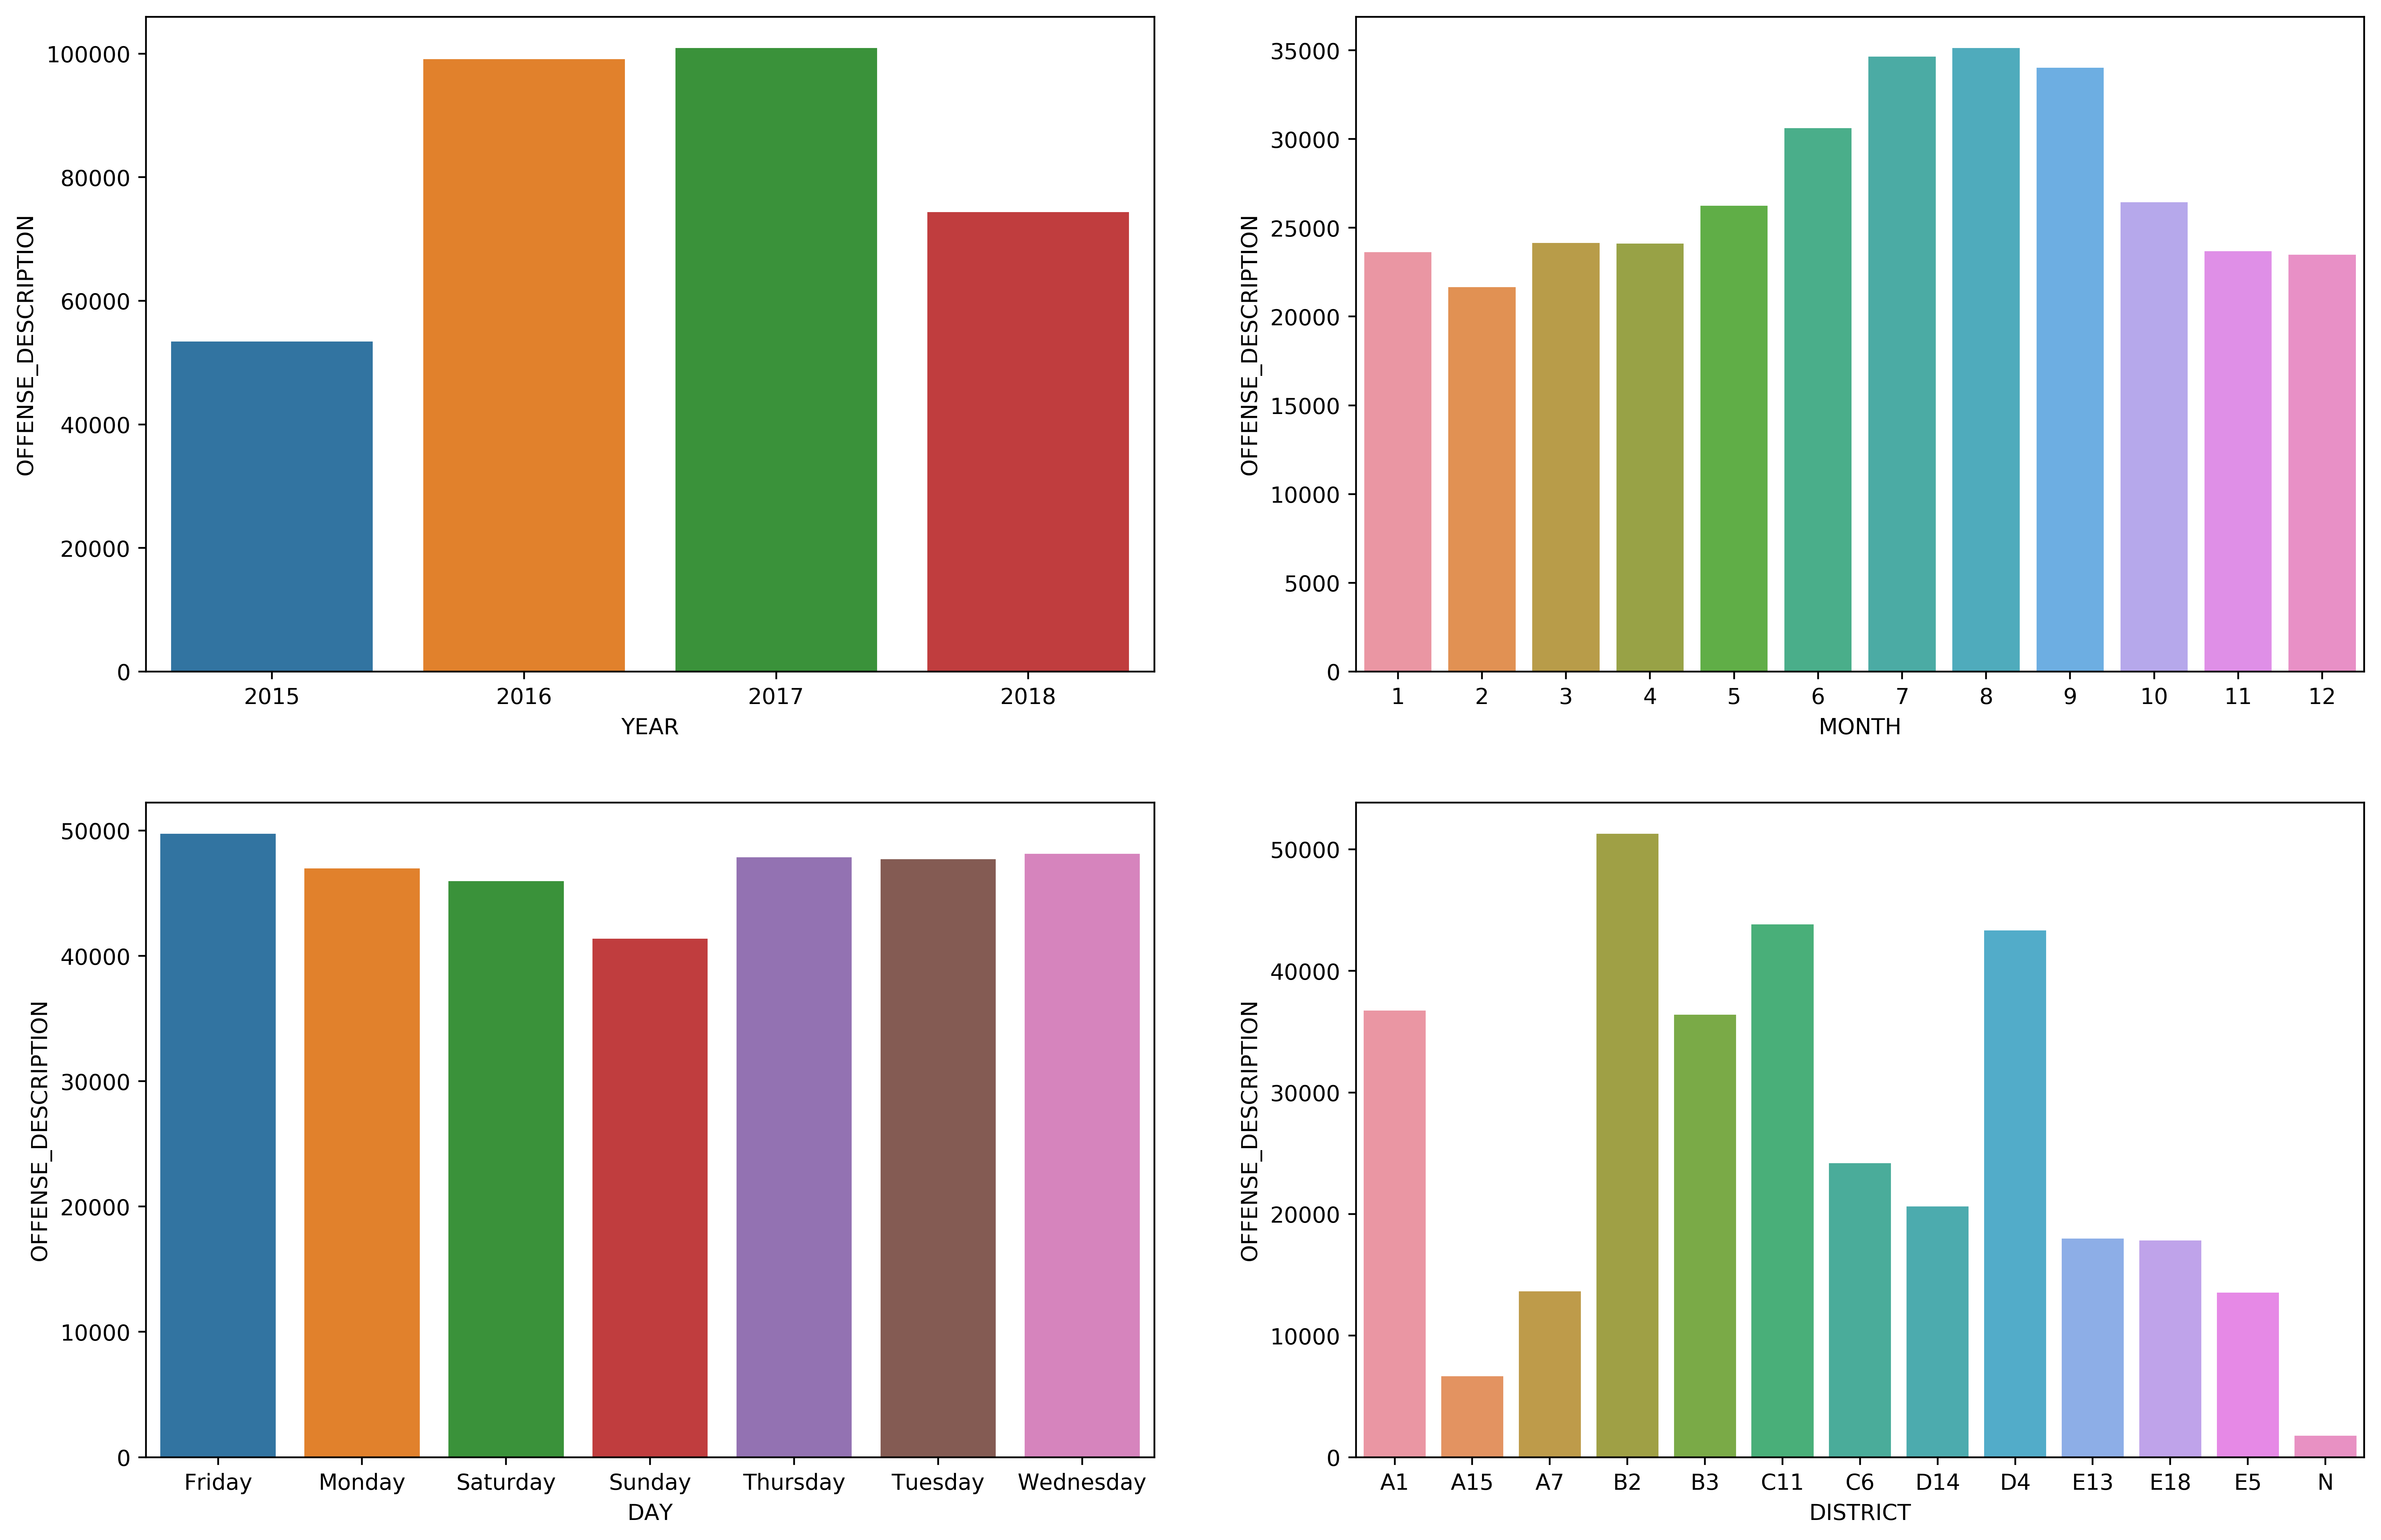

In [3]:
fig = plt.figure(figsize=(18,12), dpi=500)

# --------------------------------------------------------------------------- #
# Creating 'Year' graph

gpdata = df.groupby('YEAR').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['YEAR' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2), (0,0))
ax = sns.barplot(x='YEAR' , y='OFFENSE_DESCRIPTION' , data=ldf)

# --------------------------------------------------------------------------- #
# Creating 'Month' graph

gpdata = df.groupby('MONTH').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['MONTH' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2), (0, 1))
ax = sns.barplot(x='MONTH' , y='OFFENSE_DESCRIPTION' , data=ldf)

# --------------------------------------------------------------------------- #
# Creating 'Day' graph

gpdata = df.groupby('DAY_OF_WEEK').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['DAY' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2), (1, 0))
ax = sns.barplot(x='DAY' , y='OFFENSE_DESCRIPTION' , data=ldf)

# --------------------------------------------------------------------------- #
# Creating 'District' graph

gpdata = df.groupby('DISTRICT').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['DISTRICT' , 'OFFENSE_DESCRIPTION'])

ax1 = plt.subplot2grid((2,2), (1, 1))
ax = sns.barplot(x='DISTRICT' , y='OFFENSE_DESCRIPTION' , data=ldf)

Η παρακάτω υλοποίηση είναι επέκταση της προηγούμενης. Έχουν υλοποιηθεί stacked graphs 
με την πρόσθετη πληροφορία ότι φαίνεται και το πλήθος των crimes για κάθε κατηγορία.

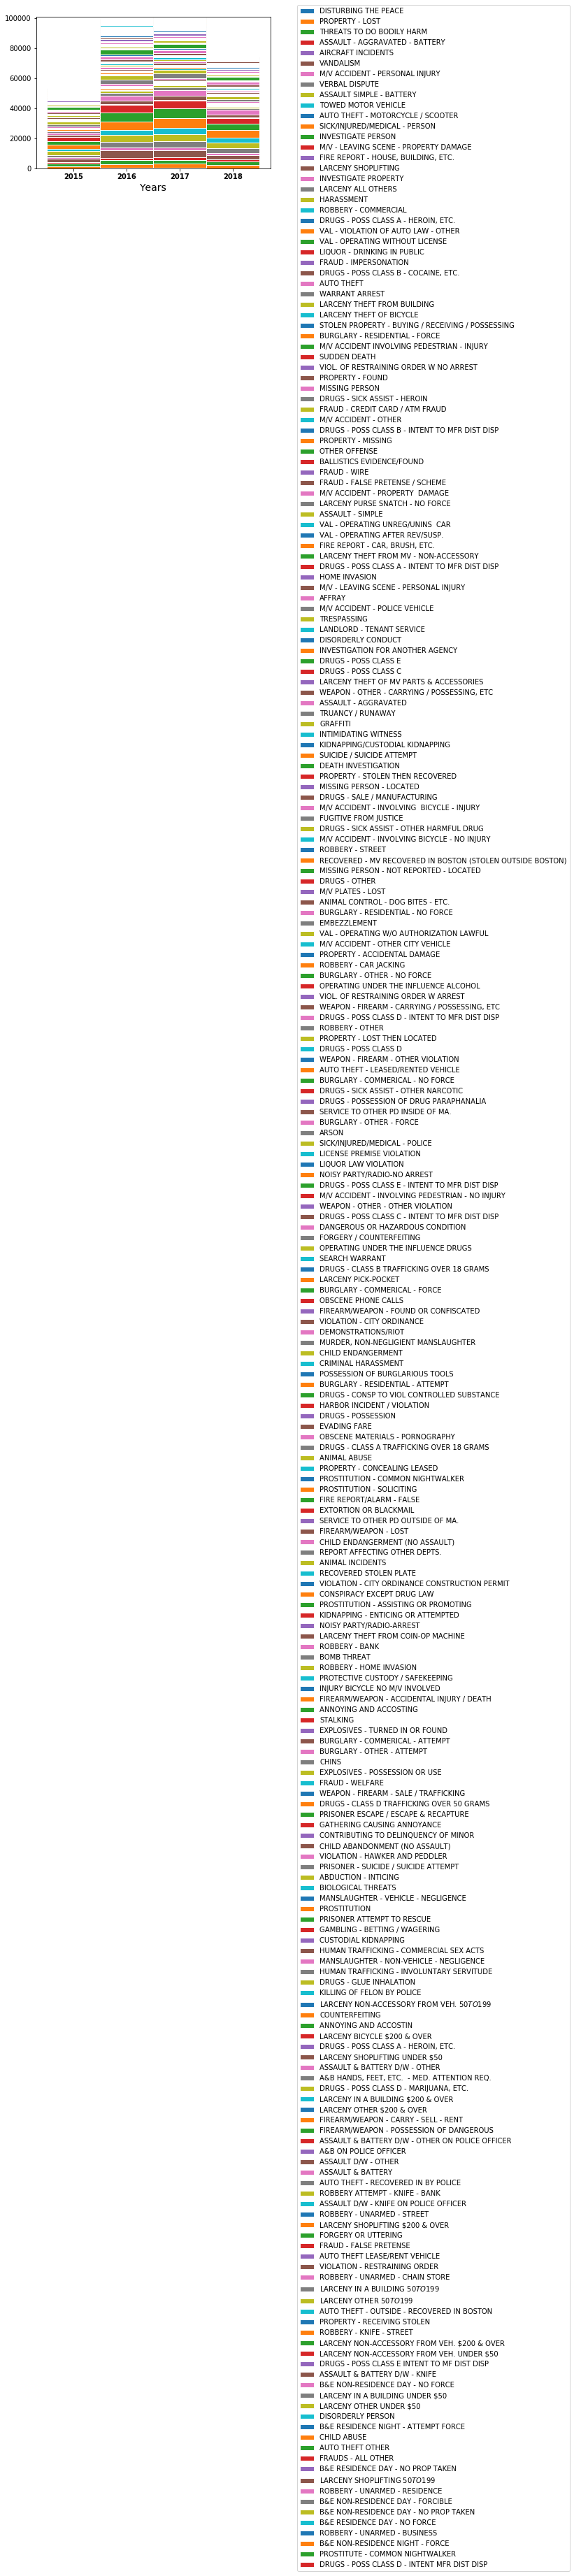

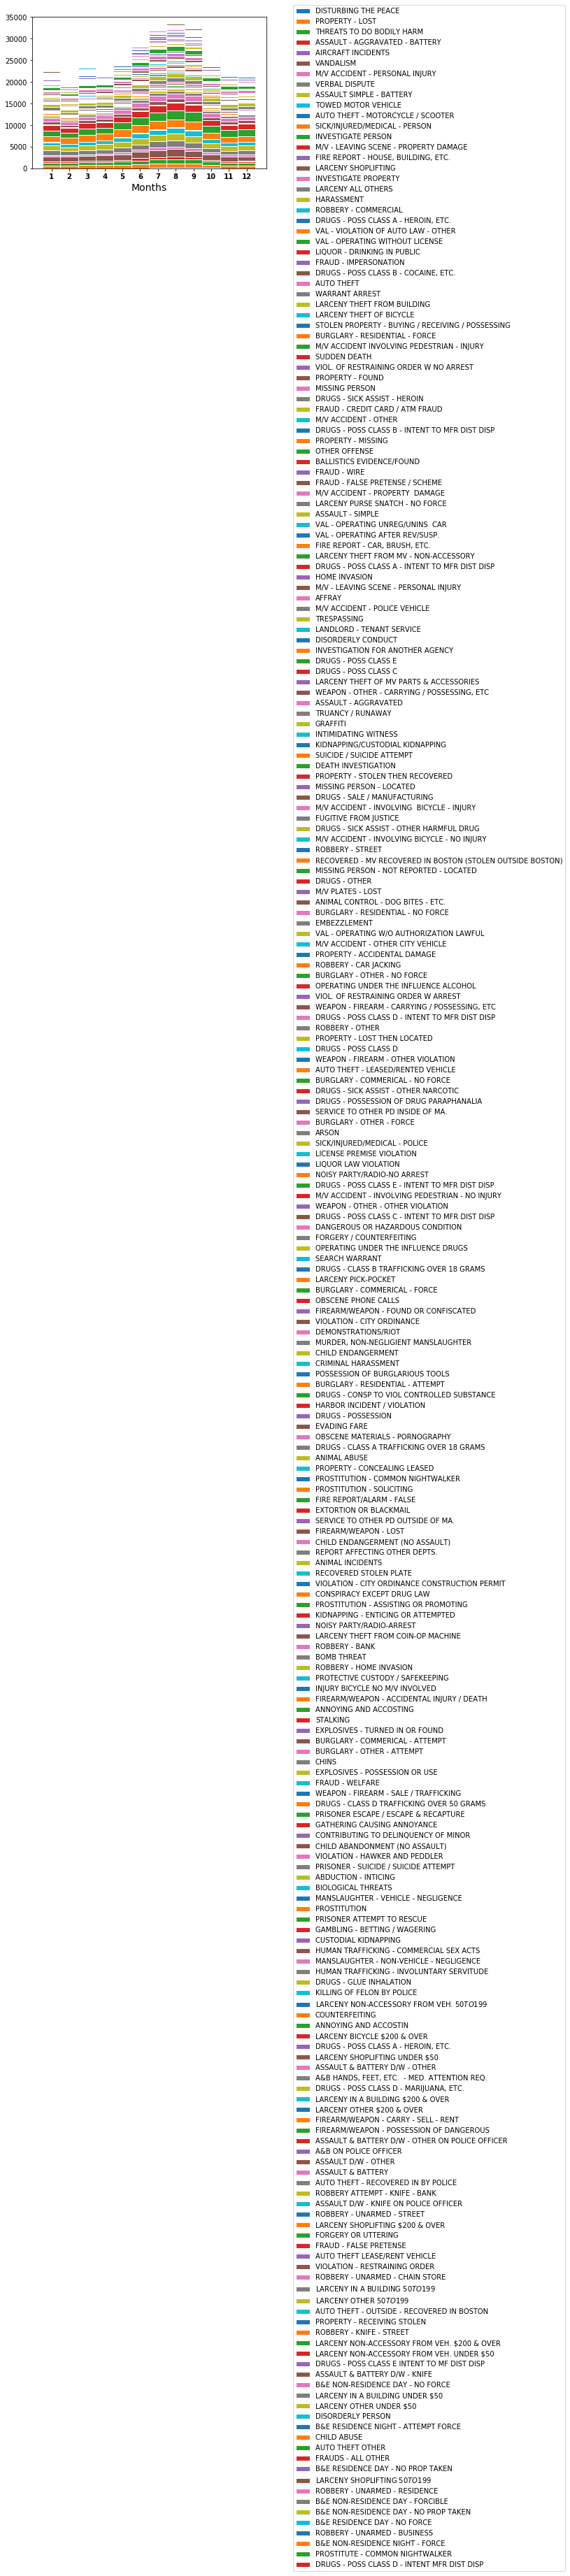

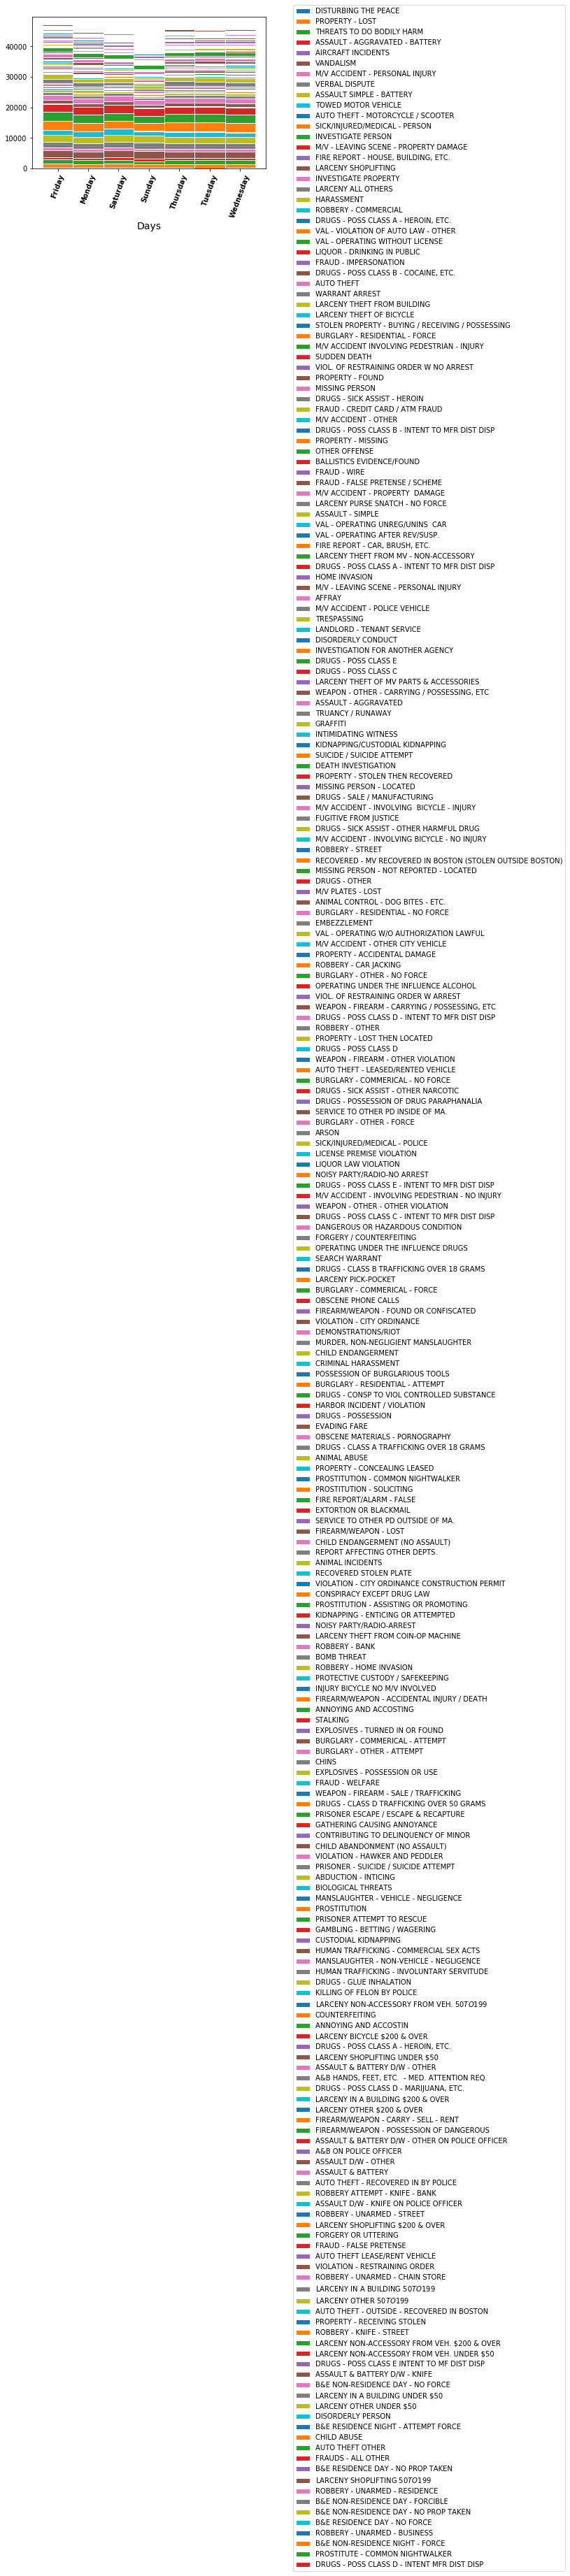

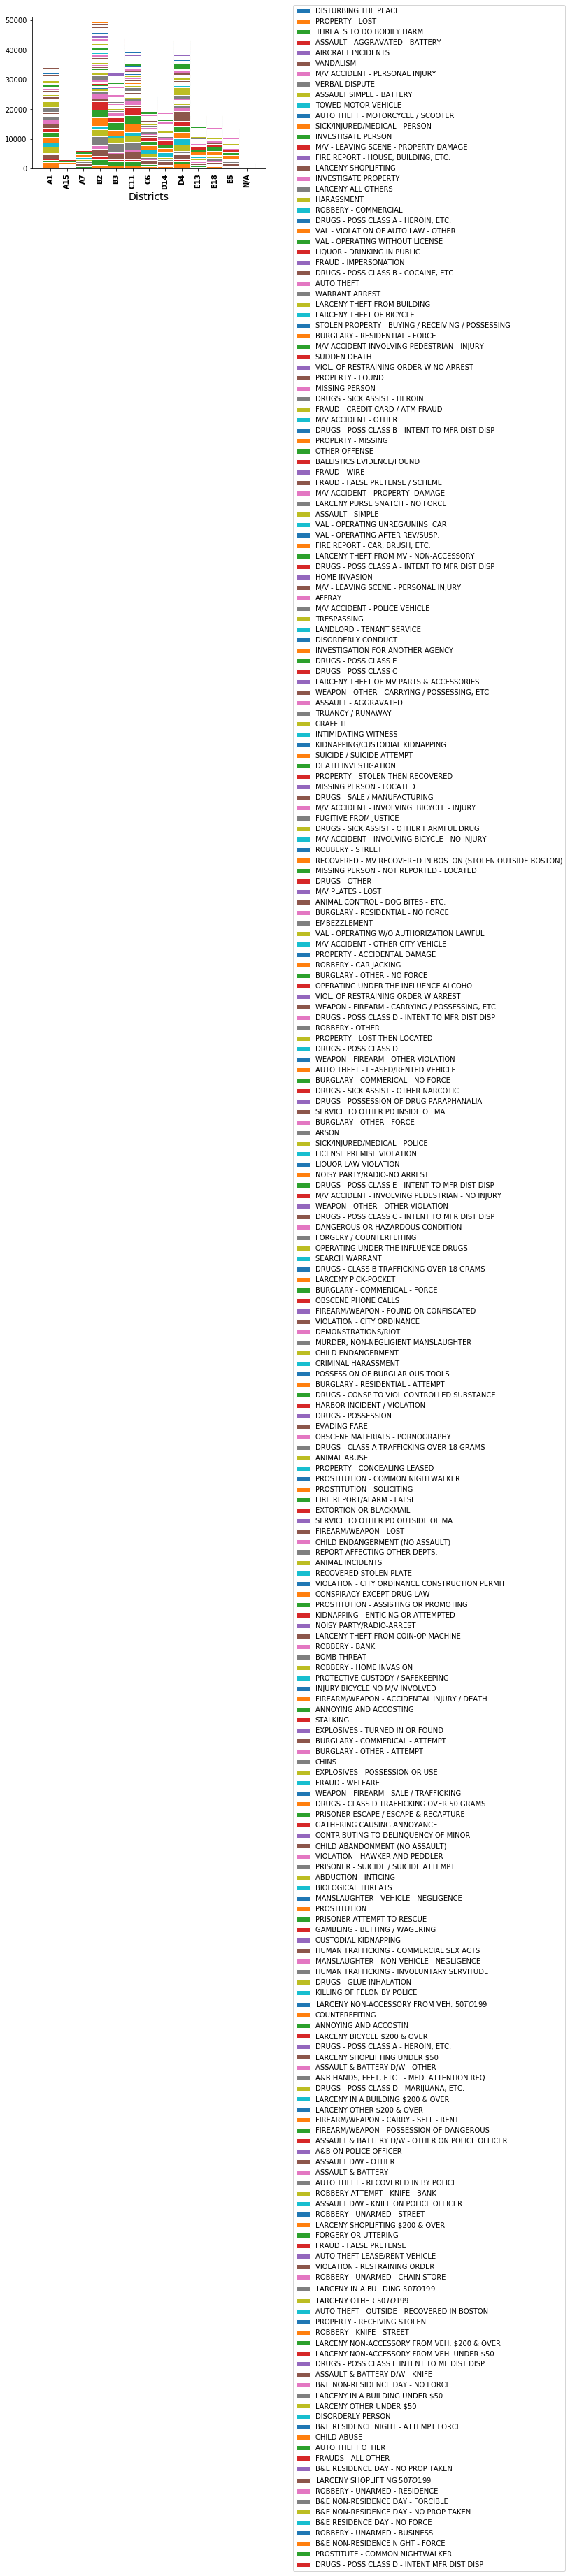

In [4]:
dl = df.values.tolist()

crimes    = col.defaultdict(lambda: 0)
years     = col.defaultdict(lambda: 0)
months    = col.defaultdict(lambda: 0)
days      = col.defaultdict(lambda: 0)
districts = col.defaultdict(lambda: 0)

bars_yr = col.defaultdict(lambda: 0)
bars_mn = col.defaultdict(lambda: 0)
bars_da = col.defaultdict(lambda: 0)
bars_di = col.defaultdict(lambda: 0)

cr_cnt=0
for tok in dl:

    bars_yr[tok[3]] = None
    bars_mn[tok[3]] = None
    bars_da[tok[3]] = None
    bars_di[tok[3]] = None    

    if tok[3] not in crimes.keys():
        crimes[tok[3]] = cr_cnt
        cr_cnt += 1
    
    years [tok[8]]  = None
    months[tok[9]]  = None
    days  [tok[10]] = None
    
    if tok[4] == 'N':
        districts['N/A']  = None
    else:
        districts[tok[4]] = None


years     = col.OrderedDict(sorted(years.items()))
months    = col.OrderedDict(sorted(months.items()))
days      = col.OrderedDict(sorted(days.items()))
districts = col.OrderedDict(sorted(districts.items()))


for i,key in enumerate(years.keys()):
    years[key] = i

for i,key in enumerate(months.keys()):
    months[key] = i

for i,key in enumerate(days.keys()):
    days[key] = i

for i,key in enumerate(districts.keys()):
    districts[key] = i


for item in crimes:
    bars_yr[item] = [0 for i in years    .keys()]
    bars_mn[item] = [0 for i in months   .keys()]
    bars_da[item] = [0 for i in days     .keys()]
    bars_di[item] = [0 for i in districts.keys()]


# The position of the bars on the x-axis
x_axis_cr = [i for i,_ in enumerate(crimes   .keys())]
x_axis_yr = [i for i,_ in enumerate(years    .keys())]
x_axis_mn = [i for i,_ in enumerate(months   .keys())]
x_axis_da = [i for i,_ in enumerate(days     .keys())]
x_axis_di = [i for i,_ in enumerate(districts.keys())]

# Names of group
label_names_cr = [key for key in crimes   .keys()]
label_names_yr = [key for key in years    .keys()]
label_names_mn = [key for key in months   .keys()]
label_names_da = [key for key in days     .keys()]
label_names_di = [key for key in districts.keys()]

for tok in dl:
    bars_yr[tok[3]][years[tok[8]]]  += 1
    bars_mn[tok[3]][months[tok[9]]] += 1
    bars_da[tok[3]][days[tok[10]]]  += 1

    if tok[4] == 'N':
        bars_di[tok[3]][districts['N/A']]  += 1
    else:
        bars_di[tok[3]][districts[tok[4]]] += 1

# --------------------------------------------------------------------------- #
# Creating 'Year' graph

bars = [0 for i in years.keys()]
barWidth = 1
legends_yr = []
for key,val in bars_yr.items():
    pl = plt.bar(x_axis_yr, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_yr.append(pl)
    bars = np.add(bars,val).tolist()

plt.xlabel('Years', fontsize=14)
plt.xticks(x_axis_yr, label_names_yr, fontweight='bold')
plt.legend((pl[0] for pl in legends_yr), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

# --------------------------------------------------------------------------- #
# Creating 'Month' graph

bars = [0 for i in months.keys()]
legends_mn = []
for key,val in bars_mn.items():
    pl = plt.bar(x_axis_mn, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_mn.append(pl)
    bars = np.add(bars,val).tolist()
    
plt.xlabel('Months', fontsize=14)
plt.xticks(x_axis_mn, label_names_mn, fontweight='bold')
plt.legend((pl[0] for pl in legends_mn), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

# --------------------------------------------------------------------------- #
# Creating 'Day' graph

bars = [0 for i in days.keys()]
legends_da = []
for key,val in bars_da.items():
    pl = plt.bar(x_axis_da, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_da.append(pl)
    bars = np.add(bars,val).tolist()

plt.xlabel('Days', fontsize=14)
plt.xticks(x_axis_da, label_names_da, fontweight='bold', rotation=70)
plt.legend((pl[0] for pl in legends_da), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)
plt.show()

# --------------------------------------------------------------------------- #
# Creating 'District' graph

bars = [0 for i in districts.keys()]
legends_di = []
for key,val in bars_di.items():
    pl = plt.bar(x_axis_di, val, bottom=bars, edgecolor='white', width=barWidth)
    legends_di.append(pl)
    bars = np.add(bars,val).tolist()

plt.xlabel('Districts', fontsize=14)
plt.xticks(x_axis_di, label_names_di, fontweight='bold', rotation=90)
plt.legend((pl[0] for pl in legends_di), (crime for crime in crimes), bbox_to_anchor=(1.1, 1.1), bbox_transform=plt.gca().transAxes)

plt.show()

2o Ερώτημα

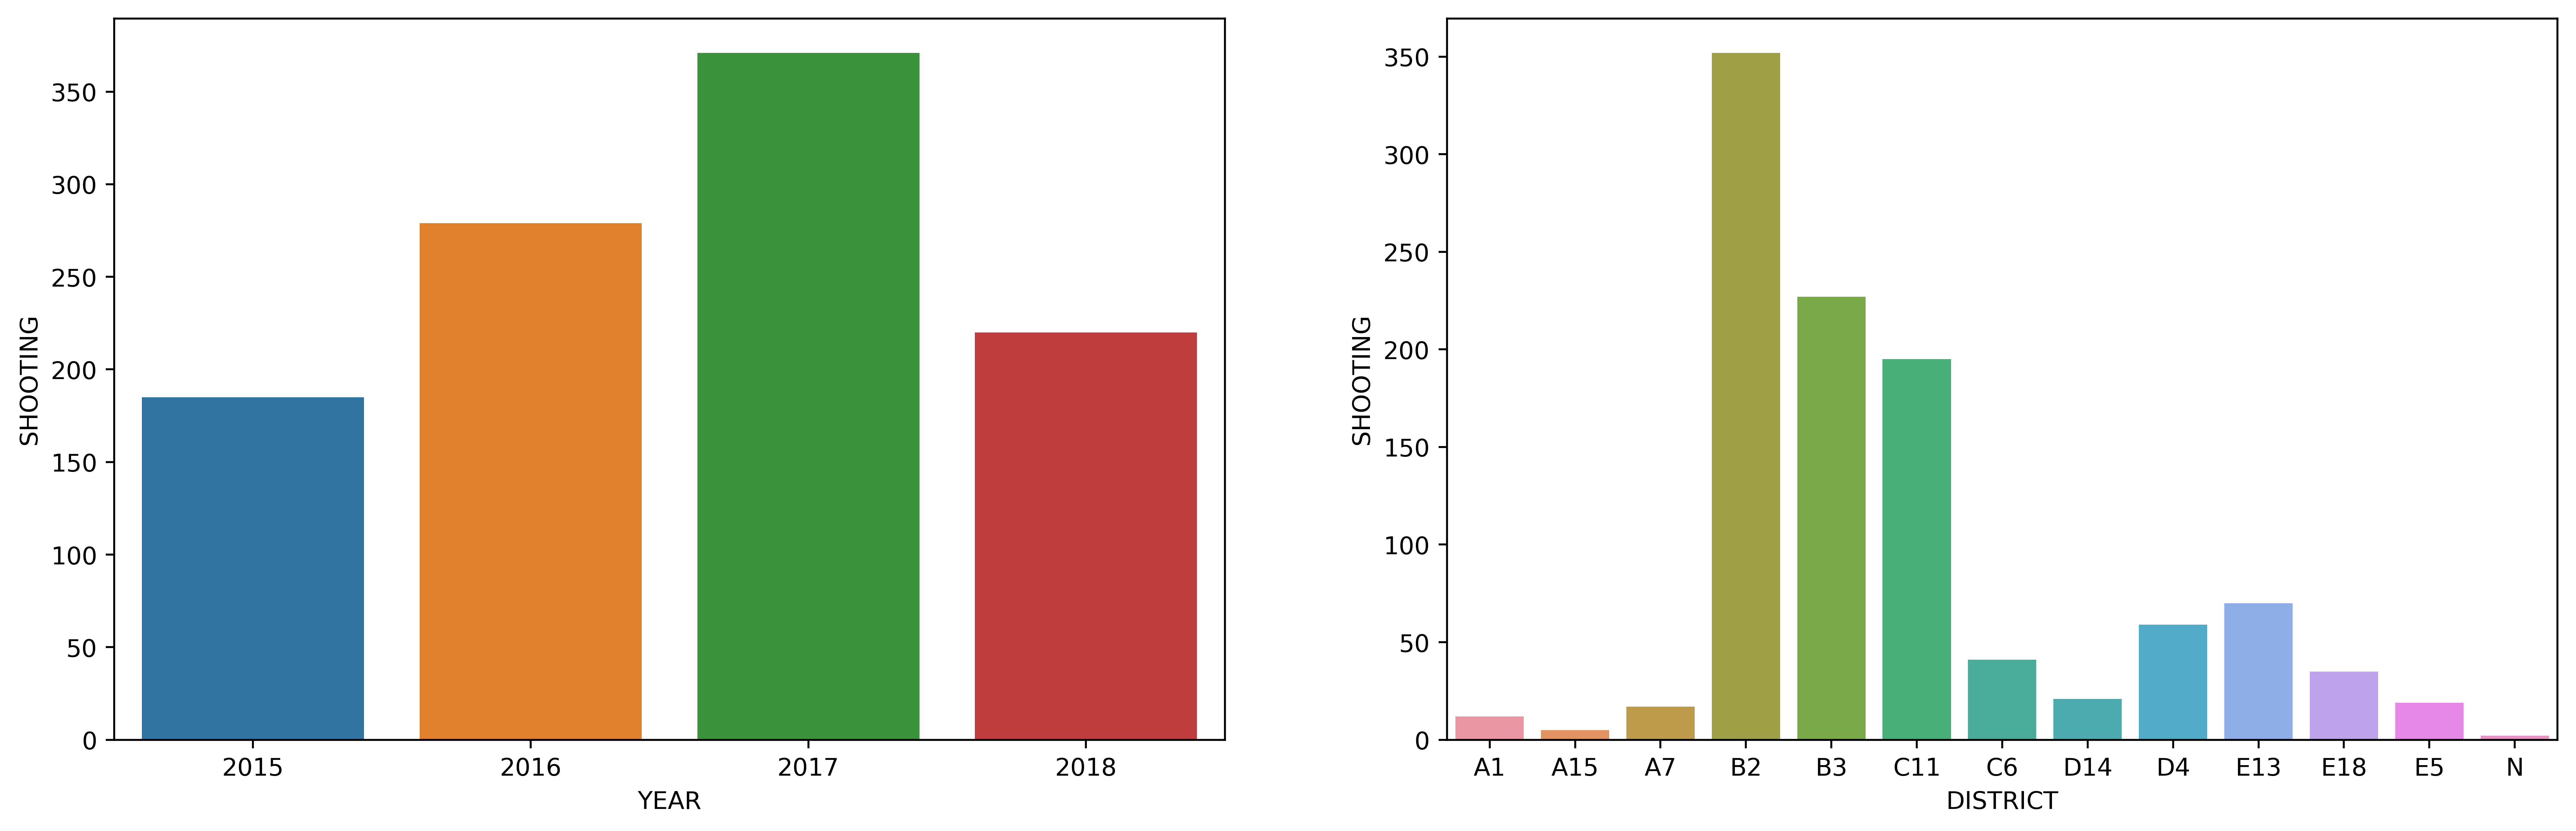

In [5]:
fig = plt.figure(figsize=(18,12), dpi=500)

# --------------------------------------------------------------------------- #
# Creating 'Year' graph

gpdata = df[df.SHOOTING == 'Y'].groupby('YEAR').count()
lst = []
for data in gpdata.iterrows():
    
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
    
ldf = pd.DataFrame(lst , columns=['YEAR' , 'SHOOTING'])

ax1 = plt.subplot2grid((2,2), (0,0))
ax = sns.barplot(x='YEAR' , y='SHOOTING' , data=ldf)

# --------------------------------------------------------------------------- #
# Creating 'District' graph

gpdata = df[df.SHOOTING == 'Y'].groupby('DISTRICT').count()
lst = []
for data in gpdata.iterrows():
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['DISTRICT' , 'SHOOTING'])

ax1 = plt.subplot2grid((2,2), (0, 1))
ax = sns.barplot(x='DISTRICT' , y='SHOOTING' , data=ldf)

3ο Ερώτημα

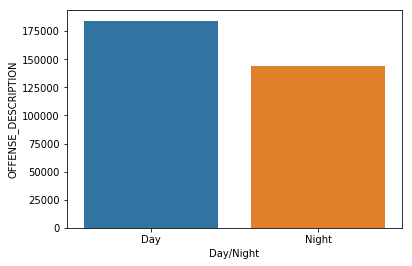

In [6]:
day_night = []

for i,col in enumerate(df.values):
    if col[11] <= 6 or col[11] >= 18:
        day_night.append('Night')
    else:
        day_night.append('Day')

df.insert(17, "Day/Night", day_night, True)

# --------------------------------------------------------------------------- #
# Creating 'Day/Night' graph

gpdata = df.groupby('Day/Night').count()
lst = []
for data in gpdata.iterrows():
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['Day/Night' , 'OFFENSE_DESCRIPTION'])

ax = sns.barplot(x='Day/Night' , y='OFFENSE_DESCRIPTION' , data=ldf)

4ο Ερώτημα

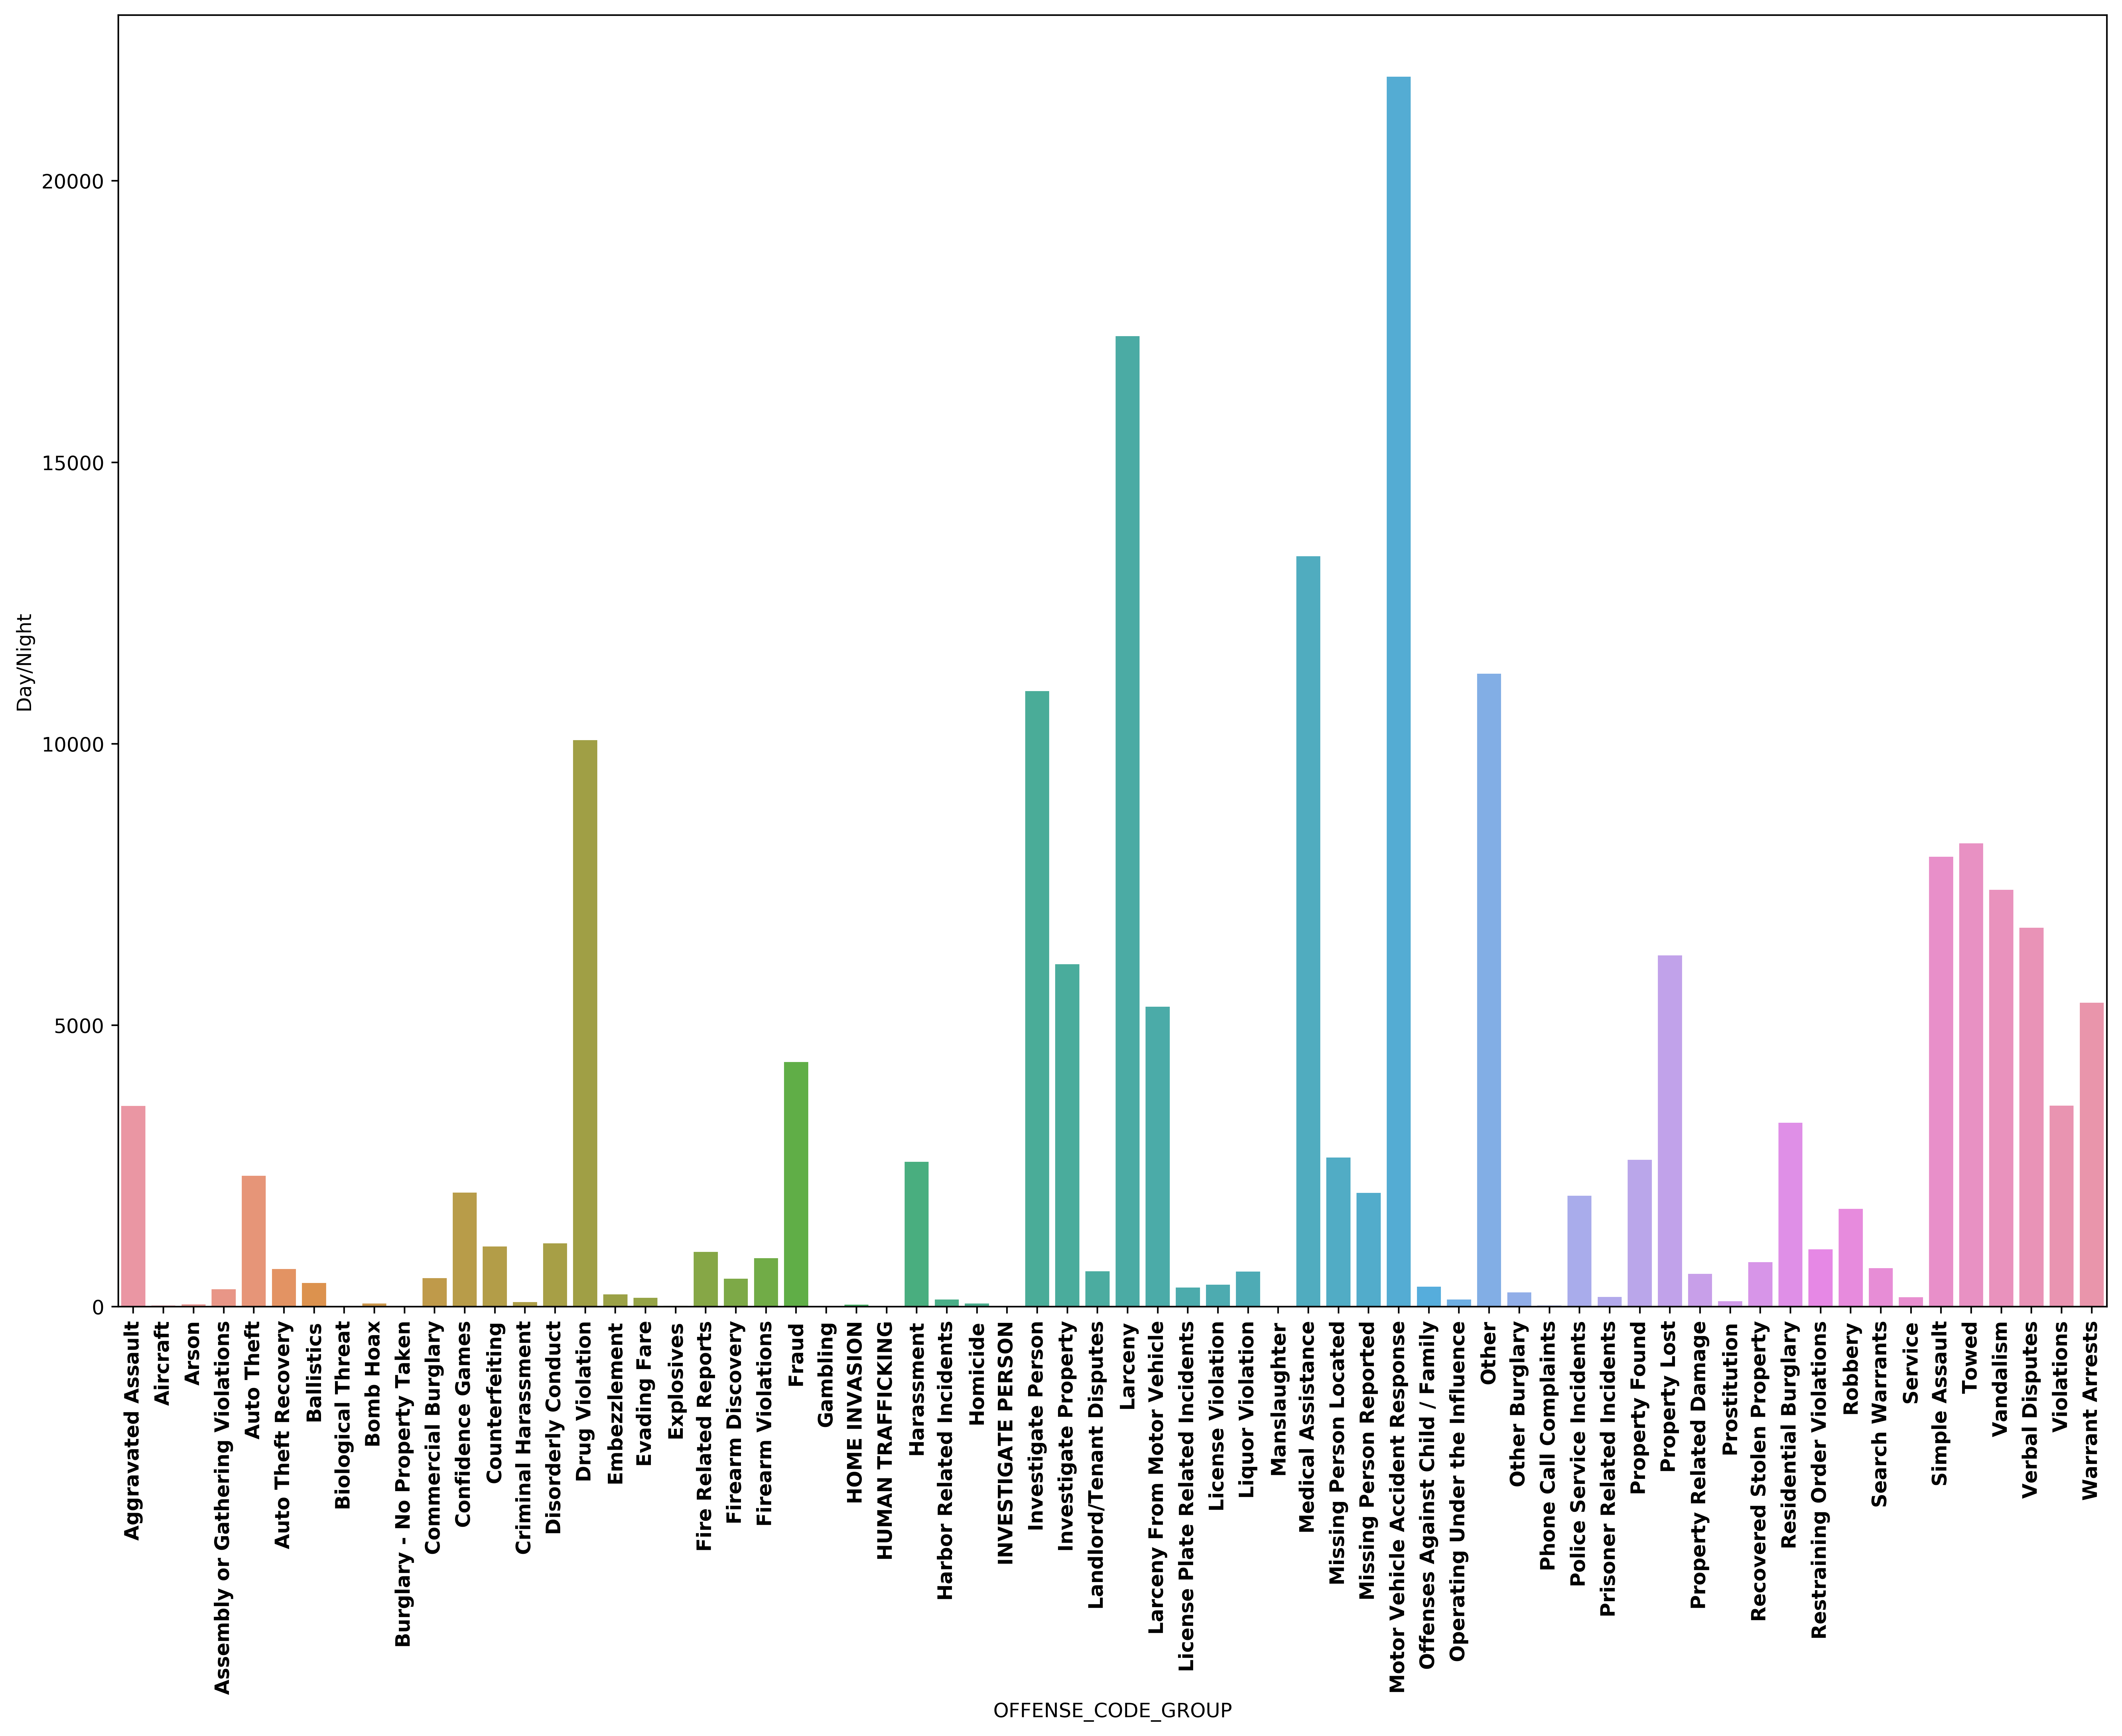

In [7]:
fig = plt.figure(figsize=(18,12), dpi=500)

gpdata = df[df['Day/Night'] == 'Day'].groupby('OFFENSE_CODE_GROUP').count()
lst = []
for data in gpdata.iterrows():
    tmp = []
    tmp.append(data[0]);
    tmp.append(data[1][0]);
    
    lst.append(tmp);
    
ldf = pd.DataFrame(lst , columns=['OFFENSE_CODE_GROUP' , 'Day/Night'])

plt.xticks(fontweight='bold', rotation=90)
ax = sns.barplot(x='OFFENSE_CODE_GROUP' , y='Day/Night' , data=ldf)

5ο Ερώτημα

In [8]:
location = df[['Lat','Long']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long']<-60)]
location = np.array(location)

# --------------------------------------------------------------------------- #
# K-Means with 2 clusters

km = KMeans(n_clusters=2)
km.fit(location)
km.predict(location)
labels1_clusters2 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 3 clusters

km = KMeans(n_clusters=3)
km.fit(location)
km.predict(location)
labels1_clusters3 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 5 clusters

km = KMeans(n_clusters=5)
km.fit(location)
km.predict(location)
labels1_clusters5 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 10 clusters

km = KMeans(n_clusters=10)
km.fit(location)
km.predict(location)
labels1_clusters10 = km.labels_

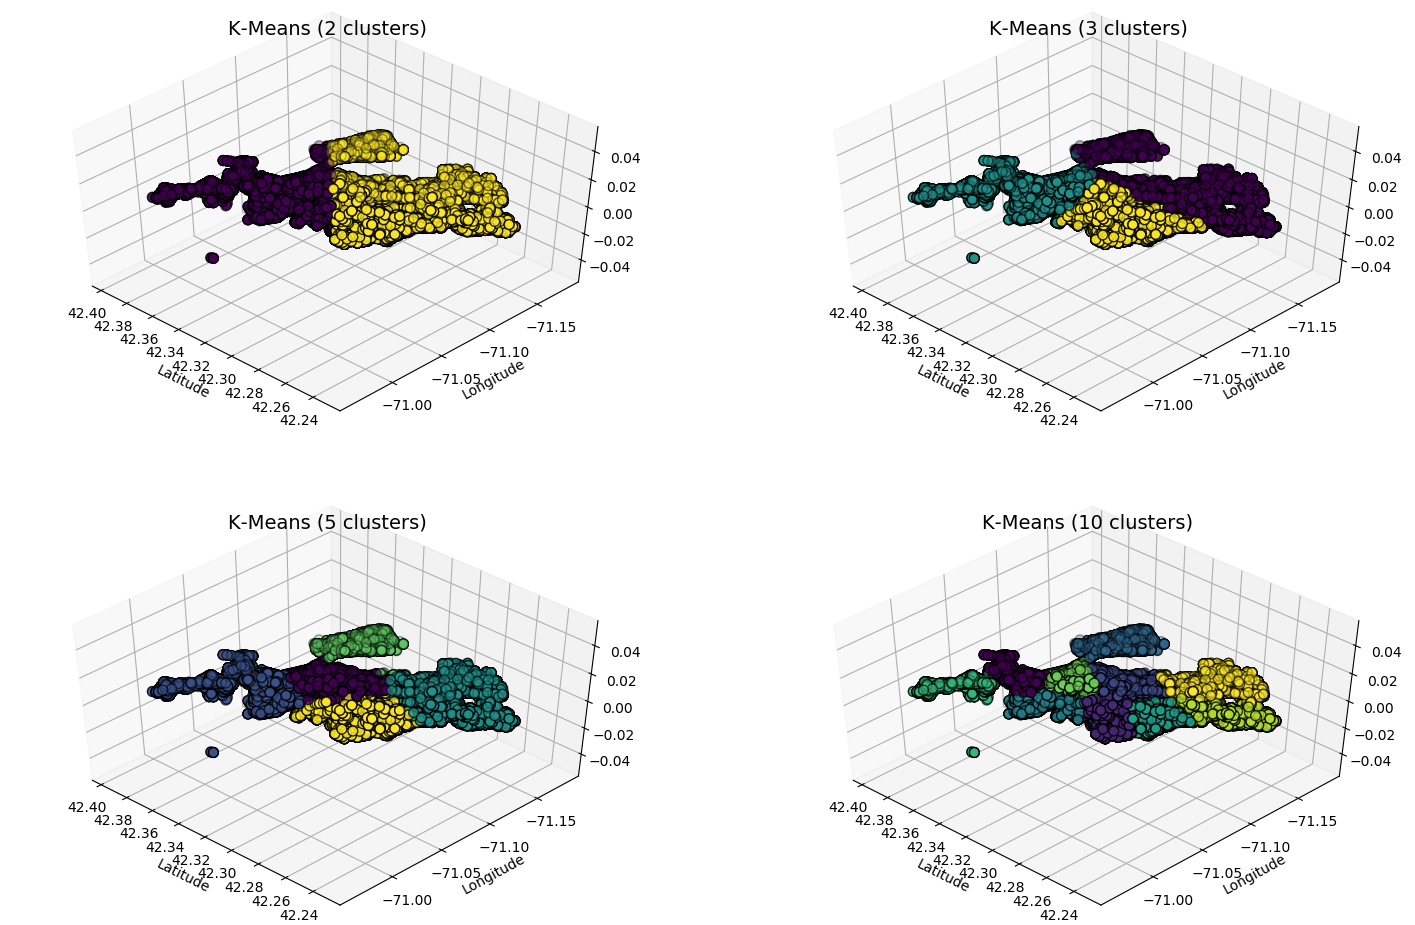

In [9]:
fig = plt.figure(figsize=(18,12), dpi=100)

# --------------------------------------------------------------------------- #
# Figuring 2-clustered plot

ax1 = fig.add_subplot(221, projection='3d', elev=48, azim=134)

ax1.scatter(location[:, 0], location[:, 1], c=labels1_clusters2.astype(np.float), edgecolor='k', s=50)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")

plt.title("K-Means (2 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 3-clustered plot

ax2 = fig.add_subplot(222, projection='3d', elev=48, azim=134)

ax2.scatter(location[:, 0], location[:, 1], c=labels1_clusters3.astype(np.float), edgecolor='k', s=50)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Longitude")

plt.title("K-Means (3 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 5-clustered plot

ax3 = fig.add_subplot(223, projection='3d', elev=48, azim=134)

ax3.scatter(location[:, 0], location[:, 1], c=labels1_clusters5.astype(np.float), edgecolor='k', s=50)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Longitude")

plt.title("K-Means (5 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 10-clustered plot

ax4 = fig.add_subplot(224, projection='3d', elev=48, azim=134)

ax4.scatter(location[:, 0], location[:, 1], c=labels1_clusters10.astype(np.float), edgecolor='k', s=50)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Longitude")

plt.title("K-Means (10 clusters)", fontsize=14)

plt.show()

In [10]:
location = df[['Lat','Long','OFFENSE_CODE']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long']<-60)]
location = np.array(location)

# --------------------------------------------------------------------------- #
# K-Means with 2 clusters

km = KMeans(n_clusters=2)
km.fit(location)
km.predict(location)
labels2_clusters2 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 3 clusters

km = KMeans(n_clusters=3)
km.fit(location)
km.predict(location)
labels2_clusters3 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 5 clusters

km = KMeans(n_clusters=5)
km.fit(location)
km.predict(location)
labels2_clusters5 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 10 clusters

km = KMeans(n_clusters=10)
km.fit(location)
km.predict(location)
labels2_clusters10 = km.labels_

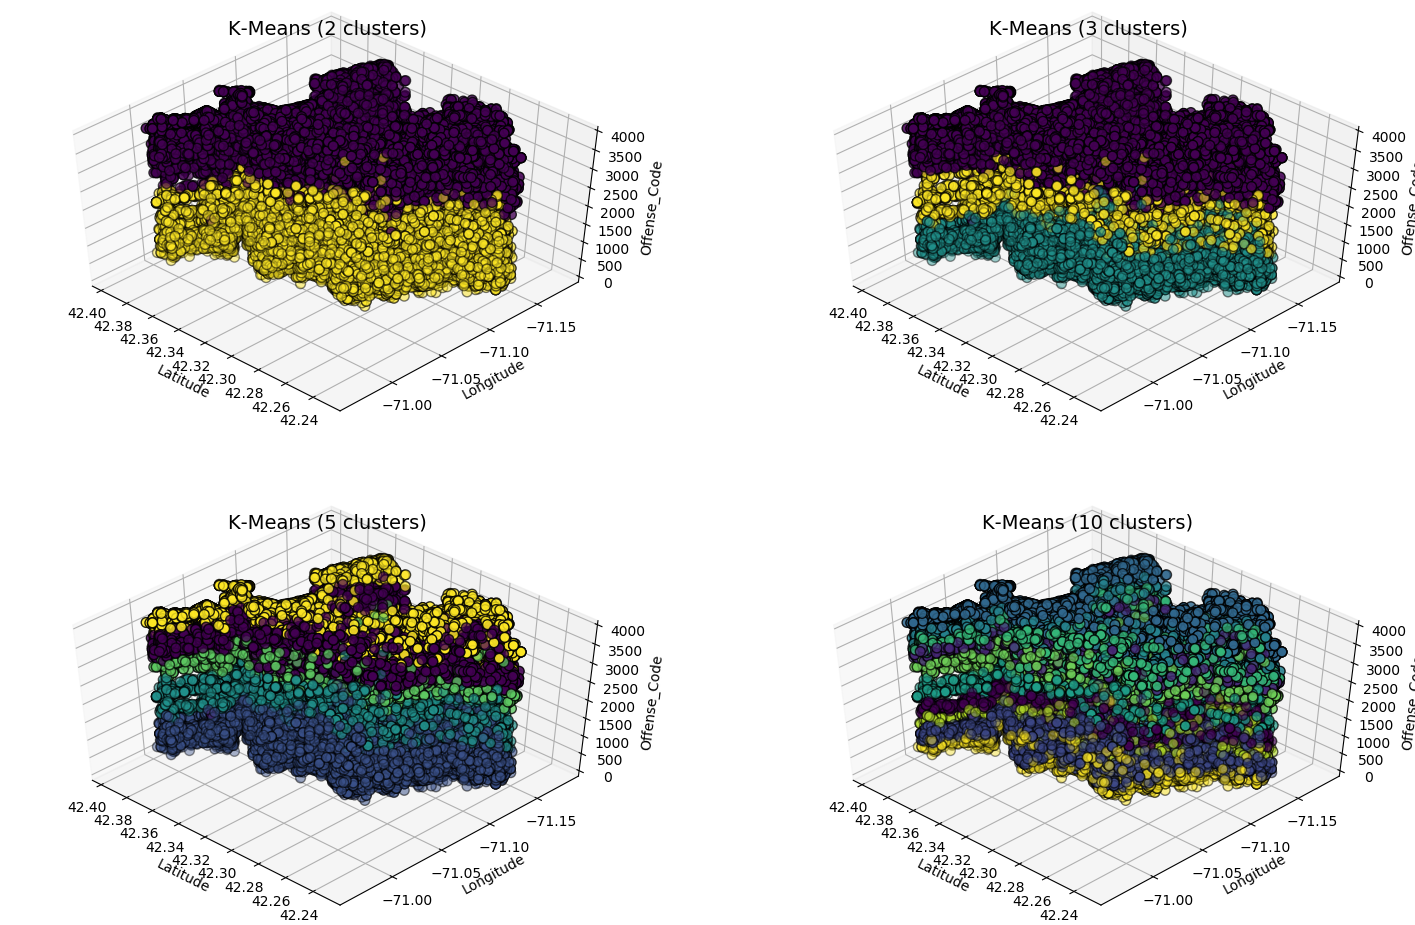

In [11]:
fig = plt.figure(figsize=(18,12), dpi=100)

# --------------------------------------------------------------------------- #
# Figuring 2-clustered plot

ax1 = fig.add_subplot(221, projection='3d', elev=48, azim=134)
ax1.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels2_clusters2.astype(np.float), edgecolor='k', s=50)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_zlabel("Offense_Code")

plt.title("K-Means (2 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 3-clustered plot

ax2 = fig.add_subplot(222, projection='3d', elev=48, azim=134)

ax2.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels2_clusters3.astype(np.float), edgecolor='k', s=50)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Longitude")
ax2.set_zlabel("Offense_Code")

plt.title("K-Means (3 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 5-clustered plot

ax3 = fig.add_subplot(223, projection='3d', elev=48, azim=134)

ax3.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels2_clusters5.astype(np.float), edgecolor='k', s=50)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Longitude")
ax3.set_zlabel("Offense_Code")

plt.title("K-Means (5 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 10-clustered plot

ax4 = fig.add_subplot(224, projection='3d', elev=48, azim=134)

ax4.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels2_clusters10.astype(np.float), edgecolor='k', s=50)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Longitude")
ax4.set_zlabel("Offense_Code")

plt.title("K-Means (10 clusters)", fontsize=14)

plt.show()

In [12]:
location = df[['Lat','Long','MONTH']]
location = location.dropna()
location = location.loc[(location['Lat']>40) & (location['Long']<-60)]
location = np.array(location)

# --------------------------------------------------------------------------- #
# K-Means with 2 clusters

km = KMeans(n_clusters=2)
km.fit(location)
km.predict(location)
labels3_clusters2 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 3 clusters

km = KMeans(n_clusters=3)
km.fit(location)
km.predict(location)
labels3_clusters3 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 5 clusters

km = KMeans(n_clusters=5)
km.fit(location)
km.predict(location)
labels3_clusters5 = km.labels_

# --------------------------------------------------------------------------- #
# K-Means with 10 clusters

km = KMeans(n_clusters=10)
km.fit(location)
km.predict(location)
labels3_clusters10 = km.labels_

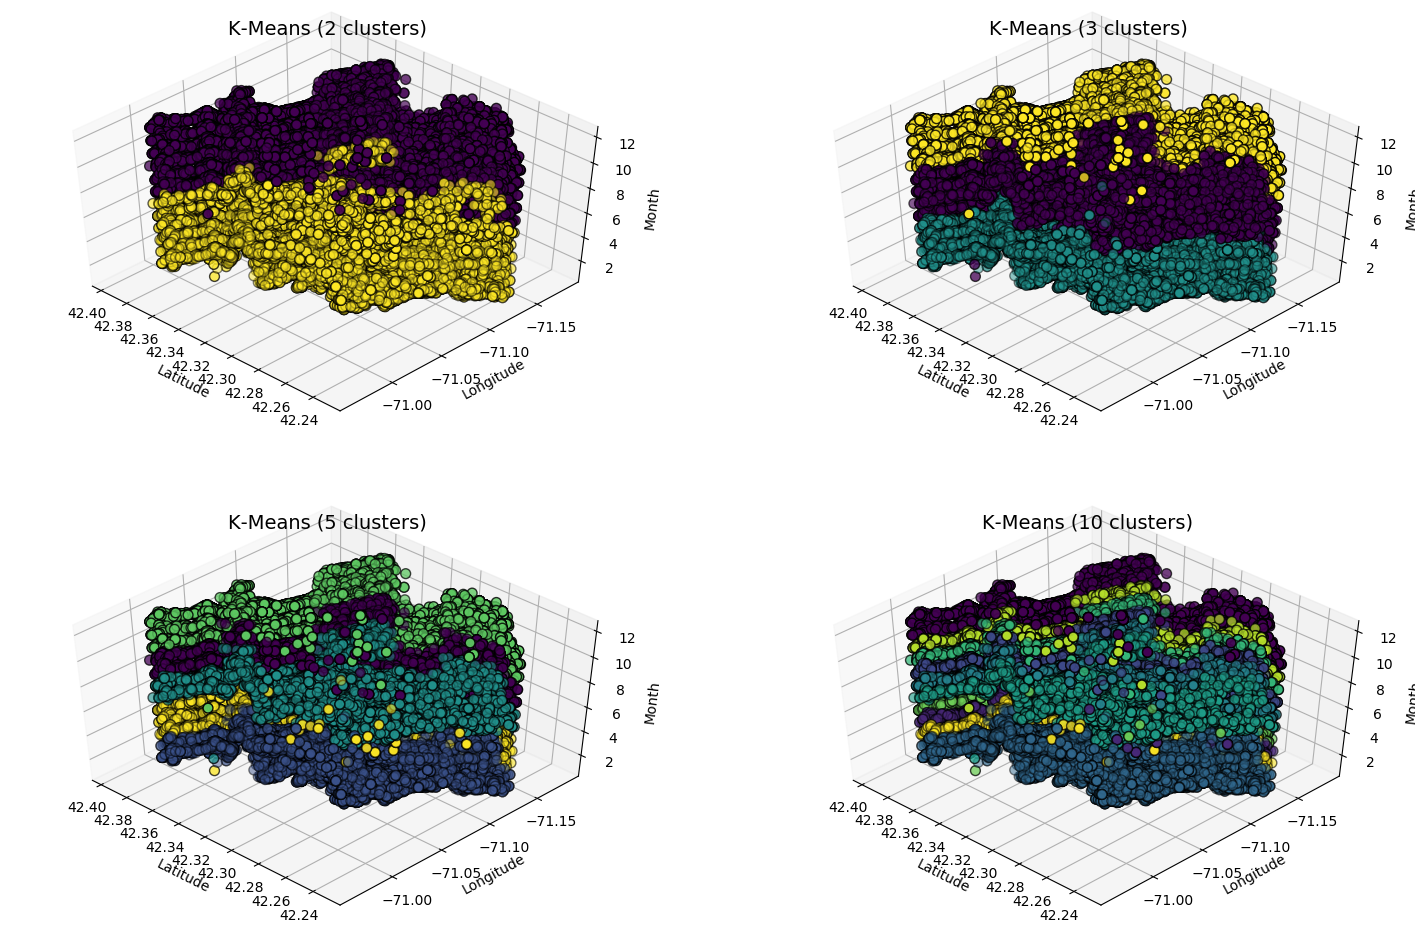

In [13]:
fig = plt.figure(figsize=(18,12), dpi=100)

# --------------------------------------------------------------------------- #
# Figuring 2-clustered plot

ax1 = fig.add_subplot(221, projection='3d', elev=48, azim=134)

ax1.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels3_clusters2.astype(np.float), edgecolor='k', s=50)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_zlabel("Month")

plt.title("K-Means (2 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 3-clustered plot

ax2 = fig.add_subplot(222, projection='3d', elev=48, azim=134)

ax2.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels3_clusters3.astype(np.float), edgecolor='k', s=50)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Longitude")
ax2.set_zlabel("Month")

plt.title("K-Means (3 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 5-clustered plot

ax3 = fig.add_subplot(223, projection='3d', elev=48, azim=134)

ax3.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels3_clusters5.astype(np.float), edgecolor='k', s=50)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Longitude")
ax3.set_zlabel("Month")

plt.title("K-Means (5 clusters)", fontsize=14)

# --------------------------------------------------------------------------- #
# Figuring 10-clustered plot

ax4 = fig.add_subplot(224, projection='3d', elev=48, azim=134)

ax4.scatter(location[:, 0], location[:, 1], location[:, 2], c=labels3_clusters10.astype(np.float), edgecolor='k', s=50)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Longitude")
ax4.set_zlabel("Month")

plt.title("K-Means (10 clusters)", fontsize=14)

plt.show()

Bonus

In [14]:
map_data = df[['OFFENSE_CODE_GROUP','Lat','Long']]
map_data = map_data.dropna()
map_data = map_data[map_data.OFFENSE_CODE_GROUP == 'Drug Violation']
map_data = map_data.loc[(map_data['Lat']>40) & (map_data['Long']<-60)]
map_data = map_data.head(500)

map = fol.Map(location=[42.3142647, -71.1103683], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map)

for loc in map_data.values:
    fol.Marker(location=[loc[1], loc[2]], popup='Drug Violation', icon=None).add_to(marker_cluster)

map.save('index.html')
map

Παραπάνω φαίνεται ένα δεικτικό αποτέλεσμα ενός interactive map με 500 γραμμές δεδομένων. Το notebook δεν μπορεί να εμφανίσει το χάρτη για όλα τα δεδομένα και γι'αυτό έχει αποθηκευτεί το αποτέλεσμα στο index.html αρχείο που δίνεται μαζί με το notebook.